<a href="https://colab.research.google.com/github/Alanjamlu34/RockPaperScissor/blob/main/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paulinus Alan Sanjaya Jamlu**



In [ ]:
pip install split-folders

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import splitfolders
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
print(os.listdir(base_dir))

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']


In [6]:
# Path ke direktori gambar
input_dir = '/tmp/rockpaperscissors/rps-cv-images'
output_dir = '/tmp/rockpaperscissors/split_data'

# Bagi dataset menjadi pelatihan dan validasi
splitfolders.ratio(base_dir, output=output_dir, ratio=(.6, .4))

Copying files: 2188 files [00:00, 2646.16 files/s]


In [7]:
base_dir1 = '/tmp/rockpaperscissors/split_data'
print(os.listdir(base_dir1))

['val', 'train']


In [8]:
train_dir = os.path.join(base_dir1, 'train')
print("Jumlah kelas train: ", len(os.listdir(train_dir)))
print(os.listdir(train_dir))

Jumlah kelas train:  3
['rock', 'paper', 'scissors']


In [9]:
validation_dir = os.path.join(base_dir1, 'val')
print("Jumlah kelas train: ", len(os.listdir(validation_dir)))
print(os.listdir(validation_dir))

Jumlah kelas train:  3
['rock', 'paper', 'scissors']


In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255, validation_split=0.4)

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
tf.keras.backend.clear_session()

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [15]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Periksa akurasi
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            # Hentikan pelatihan jika batas terpenuhi
            print("\nAkurasi di atas 95%, sehingga pelatihan dihentikan!")
            self.model.stop_training = True

# Membuat instance dari kelas callback
callbacks = MyCallback()

In [16]:
model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=2,
        callbacks = [callbacks]
        )

Epoch 1/100
100/100 - 15s - loss: 1.0893 - accuracy: 0.3800 - val_loss: 0.9879 - val_accuracy: 0.5450 - 15s/epoch - 153ms/step
Epoch 2/100
100/100 - 4s - loss: 0.6530 - accuracy: 0.7350 - val_loss: 0.4320 - val_accuracy: 0.8600 - 4s/epoch - 43ms/step
Epoch 3/100
100/100 - 4s - loss: 0.4004 - accuracy: 0.8450 - val_loss: 0.2490 - val_accuracy: 0.9250 - 4s/epoch - 45ms/step
Epoch 4/100
100/100 - 5s - loss: 0.2300 - accuracy: 0.9100 - val_loss: 0.4840 - val_accuracy: 0.8650 - 5s/epoch - 49ms/step
Epoch 5/100
100/100 - 4s - loss: 0.3455 - accuracy: 0.8675 - val_loss: 0.2824 - val_accuracy: 0.9100 - 4s/epoch - 44ms/step
Epoch 6/100
100/100 - 5s - loss: 0.2168 - accuracy: 0.9300 - val_loss: 0.1952 - val_accuracy: 0.9650 - 5s/epoch - 52ms/step
Epoch 7/100
100/100 - 4s - loss: 0.2369 - accuracy: 0.9150 - val_loss: 0.3347 - val_accuracy: 0.9050 - 4s/epoch - 43ms/step
Epoch 8/100
100/100 - 4s - loss: 0.2015 - accuracy: 0.9325 - val_loss: 0.1608 - val_accuracy: 0.9550 - 4s/epoch - 36ms/step
Epoch

Saving cWKDIx5D1KB0zqjF.png to cWKDIx5D1KB0zqjF.png
1/1 [==============================] - 0s 481ms/step


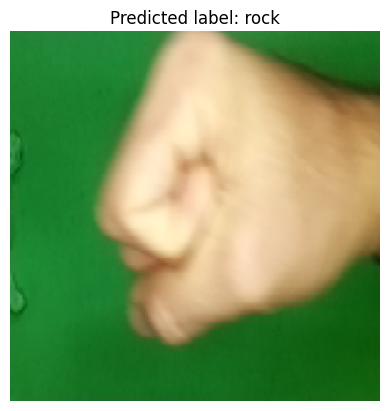

In [17]:
# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Make predictions
    classes = model.predict(x)
    class_index = np.argmax(classes)  # Get the index of the predicted class

    # Map class index to label
    class_labels = ['paper', 'rock', 'scissors']
    predicted_label = class_labels[class_index]

    # print(f"Predicted label for {fn}: {predicted_label}")
    plt.imshow(img)

    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()